<a href="https://colab.research.google.com/github/KellyJunior/Fake-News-Classifier-Machine-Learning/blob/main/Fake_News_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nlp_utils

In [ ]:
!pip install pandas

In [ ]:
!pip install seaborn

In [ ]:
!pip install -U scikit-learn

In [11]:
#importing libraries to the project
import nlp_utils
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
##from sklearn.feature_extraction import CountVectorizer, TfidVectorizer

In [14]:
#Reading  The data from the dataset
#df=pd.read_csv(train.csv)
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [12]:
#Now we can read th edata drom the dataset
df= pd.read_csv("train.csv")

In [13]:
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [19]:
#Return a tuple representing the dimensionality of the dataframe
df.shape

(20800, 5)

In [14]:
#Increase the width of the columns
pd.set_option('display.max_colwidth',-1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [15]:
#Get the title contains in the dataframe
df['title']

0        House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It            
1        FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart                                      
2        Why the Truth Might Get You Fired                                                            
3        15 Civilians Killed In Single US Airstrike Have Been Identified                              
4        Iranian woman jailed for fictional unpublished story about woman stoned to death for adultery
                                                     ...                                              
20795    Rapper T.I.: Trump a ’Poster Child For White Supremacy’                                      
20796    N.F.L. Playoffs: Schedule, Matchups and Odds - The New York Times                            
20797    Macy’s Is Said to Receive Takeover Approach by Hudson’s Bay - The New York Times             
20798    NATO, Russia To Hold Parallel Exercises In Balkans              

In [16]:
df['text']

0        House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was review

In [17]:
df['label'].value_counts()
## Count the total number of value in the column

1    10413
0    10387
Name: label, dtype: int64

In [18]:
## Check if there is some null values in the dataframe
df.isnull().sum()

id        0   
title     558 
author    1957
text      39  
label     0   
dtype: int64

In [19]:
## Remove the null or missing values from the dataframe
df=df.dropna()

In [20]:
df.isnull().sum()
## Recheck if all null values are removed from the dataset

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [21]:
df.reset_index(inplace=True)
## Reset the index of the DataFrame, and use the default one instead.

In [22]:
df

index  ...  label
0      0      ...  1    
1      1      ...  0    
2      2      ...  1    
3      3      ...  1    
4      4      ...  1    
...   ..      ... ..    
18280  20795  ...  0    
18281  20796  ...  0    
18282  20797  ...  0    
18283  20798  ...  1    
18284  20799  ...  1    

[18285 rows x 6 columns]

In [23]:
import re
import string

In [24]:
## remove all the number with letters attached to them
alpanumeric = lambda x: re.sub('\w*\d\w*', '', x)

## COnvert all the strings to lowercse .lower() 
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation),' ', x.lower())

## Remove all '\n' in the string and replace it white space
remove_n = lambda x: re.sub("\n", " ",x)

## Remove all the non-ascii characters
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ',x)

df['text']= df['text'].map(alpanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [25]:
df['text']

0        house dem aide  we didn t even see comey s letter until jason chaffetz tweeted it by darrell lucus on october    subscribe jason chaffetz on the stump in american fork  utah   image courtesy michael jolley  available under a creative commons by license   with apologies to keith olbermann  there is no doubt who the worst person in the world is this week fbi director james comey  but according to a house democratic aide  it looks like we also know who the second worst person is as well  it turns out that when comey sent his now infamous letter announcing that the fbi was looking into emails that may be related to hillary clinton s email server  the ranking democrats on the relevant committees didn t hear about it from comey  they found out via a tweet from one of the republican committee chairmen   as we now know  comey notified the republican chairmen and democratic ranking members of the house intelligence  judiciary  and oversight committees that his agency was reviewing emai

In [26]:
Y=df['label']

In [27]:
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [28]:
!pip install tfidf

In [29]:
## Split the data into trainning and testing data
X_train, X_test, Y_train, Y_test = train_test_split(df['text'], Y, test_size=0.30, random_state=40)

In [30]:
!pip install sklearn

In [31]:
!pip uninstall scikit-learn

Uninstalling scikit-learn-0.24.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/scikit_learn-0.24.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/scikit_learn.libs/libgomp-f7e03b3e.so.1.0.0
    /usr/local/lib/python3.7/dist-packages/sklearn/*
Proceed (y/n)? n


In [1]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (0.24.2)


In [4]:
import sklearn

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
## Convert a collection of raw documents to a matrix of TF-IDF features.
tfidf_vect = TfidfVectorizer(stop_words = 'english', max_df=0.7)
tfidf_train = tfidf_vect.fit_transform(X_train)
tfidf_test = tfidf_vect.transform(X_test)

In [33]:
print(tfidf_test)

  (0, 116553)	0.03886548223169257
  (0, 115702)	0.02577799575708681
  (0, 115692)	0.00904800329154621
  (0, 114895)	0.009673419081344278
  (0, 114861)	0.016618616020114874
  (0, 114848)	0.010562420147987915
  (0, 113165)	0.013935134858730162
  (0, 113110)	0.016117563226566926
  (0, 113013)	0.027915866741656793
  (0, 112960)	0.0187879083094958
  (0, 112621)	0.014233357454810993
  (0, 112502)	0.033848840233184616
  (0, 112472)	0.018913078792303722
  (0, 111638)	0.022574963902960127
  (0, 111149)	0.03305268263185922
  (0, 110726)	0.030170078331103658
  (0, 110466)	0.011808060706868613
  (0, 110343)	0.03305268263185922
  (0, 110196)	0.017882582744640885
  (0, 108797)	0.0201639418741461
  (0, 107753)	0.0445860293134556
  (0, 107752)	0.0445860293134556
  (0, 107301)	0.026722385232109524
  (0, 106653)	0.04142088061358076
  (0, 106336)	0.015087881216580364
  :	:
  (5485, 14393)	0.030676892638861704
  (5485, 13981)	0.03850878930619704
  (5485, 13630)	0.05358526389326042
  (5485, 11899)	0.037197

In [34]:
print(tfidf_vect.get_feature_names()[-10:])

['zwrocie', 'zwrotu', 'zwyci', 'zxycmwjdxj', 'zyaratgah', 'zygankow', 'zylinderkopfdichtung', 'zynga', 'zytsov', 'zyuganov']


In [37]:
#Convert a collection of text documents to a matrix of token counts
Count_vect = CountVectorizer(stop_words= 'english')
Count_train = Count_vect.fit_transform(X_train.values)
Count_test = Count_vect.transform(X_test.values)

In [38]:
print(Count_test)

  (0, 57)	1
  (0, 807)	1
  (0, 1146)	1
  (0, 1150)	2
  (0, 1164)	1
  (0, 1812)	1
  (0, 1947)	1
  (0, 2541)	1
  (0, 2646)	1
  (0, 3505)	4
  (0, 3882)	2
  (0, 4948)	1
  (0, 5342)	1
  (0, 5768)	1
  (0, 6331)	1
  (0, 6941)	1
  (0, 6948)	1
  (0, 7269)	1
  (0, 8868)	1
  (0, 8874)	1
  (0, 8878)	3
  (0, 9309)	1
  (0, 9457)	9
  (0, 9503)	2
  (0, 9718)	1
  :	:
  (5485, 100570)	1
  (5485, 102087)	1
  (5485, 103139)	1
  (5485, 103332)	1
  (5485, 104069)	1
  (5485, 104142)	1
  (5485, 104480)	1
  (5485, 104552)	1
  (5485, 104782)	1
  (5485, 104912)	2
  (5485, 105867)	5
  (5485, 106262)	1
  (5485, 107691)	1
  (5485, 108797)	1
  (5485, 108839)	4
  (5485, 109772)	1
  (5485, 111259)	1
  (5485, 111530)	2
  (5485, 113165)	1
  (5485, 113823)	1
  (5485, 114711)	1
  (5485, 114723)	1
  (5485, 115134)	1
  (5485, 115692)	1
  (5485, 116007)	1


In [39]:
#Get the feature function of the count_vectorizer
print(Count_vect.get_feature_names()[0:10])

['aa', 'aaa', 'aaah', 'aaahhh', 'aaajiao', 'aaany', 'aaas', 'aab', 'aabb', 'aac']


In [40]:
## Naive Bayes Model
## TF-Idf Vectorized
from sklearn.naive_bayes import MultinomialNB

In [42]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [44]:
## Applying Naive Bayes 
clf = MultinomialNB()
clf.fit(tfidf_train,Y_train)
pred = clf.predict(tfidf_test)
score= metrics.accuracy_score(Y_test, pred)
print("accuracy: %0.3f" % score)
cm = metrics.confusion_matrix(Y_test,pred)
print(cm)

accuracy: 0.772
[[3103    8]
 [1243 1132]]


In [45]:
print('Wrong predictions out of total')
print((Y_test !=pred).sum(), '/', ((Y_test == pred).sum()+(Y_test != pred).sum()))
print('Percentage accuracy: ',100*accuracy_score(Y_test, pred))

Wrong predictions out of total
1251 / 5486
Percentage accuracy:  77.19650018228216


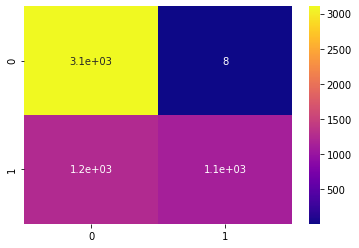

In [46]:
## Plotting confusion matrix for TF-Idf Vectorizer
sns.heatmap(cm,cmap="plasma", annot=True)

Count Vectorizer

In [51]:
## Applying Naive Bayes
clf = MultinomialNB()
clf.fit(Count_train,Y_train)
pred1= clf.predict(Count_test)
score = metrics.accuracy_score(Y_test, pred1)
print("accuracy: %0.3f" %score)
cm2 = metrics.confusion_matrix(Y_test,pred1)
print(cm2)

accuracy: 0.903
[[2977  134]
 [ 397 1978]]


In [54]:
print('wrong prediction out of total')
print((Y_test !=pred1).sum(), '/',((Y_test ==pred1).sum()+(Y_test != pred1).sum()))
print('Percentage accuracy: ', 100*accuracy_score(Y_test,pred1))

wrong prediction out of total
531 / 5486
Percentage accuracy:  90.32081662413415


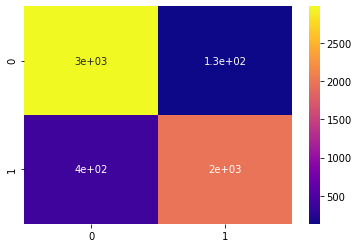

In [55]:
## Plotting confusion matrix for TF-Idf Vectorizer
sns.heatmap(cm2,cmap="plasma", annot=True)

Random Forest Model

In [56]:
from sklearn.ensemble import RandomForestClassifier

TF-idf Vectorized

In [58]:
RF=RandomForestClassifier().fit(tfidf_train, Y_train)
#predict on train
train_pred2 = RF.predict(tfidf_train)
#Accuracy on train
print("Model accuracy on train is : ", accuracy_score(Y_train, train_pred2))

#predict on test
test_pred2=RF.predict(tfidf_test)
## accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_pred2))
print('-'*50)

## Confusion matrix
print("confusion_matrix train is:", metrics.confusion_matrix(Y_train, train_pred2))
print("confusion_matrix test is: ", metrics.confusion_matrix(Y_test,test_pred2))
print('Wrog prediction out of total')
print('-'*50)

##Wrong predictions made
print((Y_test !=test_pred2).sum(),'/',((Y_test == test_pred2).sum()+(Y_test != test_pred2).sum()))
print('-'*50)


Model accuracy on train is :  0.9999218688960075
Model accuracy on test is:  0.9075829383886256
--------------------------------------------------
confusion_matrix train is: [[7249    1]
 [   0 5549]]
confusion_matrix test is:  [[3048   63]
 [ 444 1931]]
Wrog prediction out of total
--------------------------------------------------
507 / 5486
--------------------------------------------------


Count Vectorized


In [59]:
RF=RandomForestClassifier().fit(Count_train, Y_train)
#predict on train
train_pred2 = RF.predict(Count_train)
#Accuracy on train
print("Model accuracy on train is : ", accuracy_score(Y_train, train_pred2))

#predict on test
test_pred2=RF.predict(Count_test)
## accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_pred2))
print('-'*50)

## Confusion matrix
print("confusion_matrix train is:", metrics.confusion_matrix(Y_train, train_pred2))
print("confusion_matrix test is: ", metrics.confusion_matrix(Y_test,test_pred2))
print('Wrog prediction out of total')
print('-'*50)

##Wrong predictions made
print((Y_test !=test_pred2).sum(),'/',((Y_test == test_pred2).sum()+(Y_test != test_pred2).sum()))
print('-'*50)


Model accuracy on train is :  0.9999218688960075
Model accuracy on test is:  0.9066715275246081
--------------------------------------------------
confusion_matrix train is: [[7249    1]
 [   0 5549]]
confusion_matrix test is:  [[3050   61]
 [ 451 1924]]
Wrog prediction out of total
--------------------------------------------------
512 / 5486
--------------------------------------------------


In [60]:
from sklearn.neighbors import  KNeighborsClassifier

In [63]:
#fit the model on the train data
KNN = KNeighborsClassifier().fit(tfidf_train,Y_train)
#predict on train
train_preds4=KNN.predict(tfidf_train)
## Accuracyy on test
print("Model accuracy on test is: ", accuracy_score(Y_train, train_preds4))
## Predict on test
test_preds4 = KNN.predict(tfidf_test)
print("Model accuracy on test is :", accuracy_score(Y_test, test_preds4))
print('-'*50)

Model accuracy on test is:  0.5187123994062036
Model accuracy on test is : 0.48651111921254103
--------------------------------------------------


In [65]:
## Confusion Matrix
print("Confusion_matrix train is: ", metrics.confusion_matrix(Y_train, train_preds4))
print("Confusion_matrix test is :", metrics.confusion_matrix(Y_test, test_preds4))
print('-'*50)
#Wrong prediction 
print((Y_test != test_preds4).sum(), '/', ((Y_test == test_preds4).sum()+(Y_test != test_preds4).sum()))

Confusion_matrix train is:  [[1106 6144]
 [  16 5533]]
Confusion_matrix test is : [[ 304 2807]
 [  10 2365]]
--------------------------------------------------
2817 / 5486


In [68]:
## Fit the model on train data
KNN = KNeighborsClassifier().fit(Count_train, Y_train)
## predict on the train
train_preds5= KNN.predict(Count_train)
## Accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds5))
## predict on test
test_preds5 = KNN.predict(Count_test)
## Accuracy on test
print("Model accuracy on test is: " , accuracy_score(Y_test, test_preds5))
print('-'*50)

Model accuracy on train is:  0.7850613329166342
Model accuracy on test is:  0.7320452059788553
--------------------------------------------------


In [69]:
##Confusion matrix
print("Confusion_matrix train is: ", metrics.confusion_matrix(Y_train, train_preds5))
print("Confusion_matrix test is :", metrics.confusion_matrix(Y_test, test_preds5))
print('-'*50)
#Wrong prediction 
print((Y_test != test_preds5).sum(), '/', ((Y_test == test_preds5).sum()+(Y_test != test_preds5).sum()))

Confusion_matrix train is:  [[4680 2570]
 [ 181 5368]]
Confusion_matrix test is : [[1770 1341]
 [ 129 2246]]
--------------------------------------------------
1470 / 5486
